---
title: "Your First Map (kiva)"
author: "Jungwoo Lee"
date: "2023-05-04"
categories: [code, python]
image: "kiva.png"
---

> Your First Map Exercise, Kaggle

# Introduction
[Kiva.org](https://www.kiva.org/)는 전 세계 가난한 사람들에게 금융 서비스를 제공하는 온라인 크라우드 펀딩 플랫폼입니다. Kiva 대출 기관은 200만 명이 넘는 사람들에게 10억 달러 이상의 대출을 제공했습니다.
<center>
<img src="https://storage.googleapis.com/kaggle-media/learn/images/2G8C53X.png" width="500"><br/>
</center>

Kiva는 "Field Partners"의 글로벌 네트워크를 통해 세계에서 가장 외진 곳에 도달합니다. 이러한 파트너는 차용자를 심사하고 서비스를 제공하며 대출을 관리하기 위해 지역 사회에서 일하는 지역 조직입니다

이 실습에서는 필리핀의 Kiva 대출을 조사합니다. 새로운 현장 파트너를 모집할 기회를 식별하기 위해 Kiva의 현재 네트워크 외부에 있을 수 있는 지역을 식별할 수 있습니까?

시작하려면 아래 코드 셀을 실행하여 피드백 시스템을 설정하십시오.

# Reading data

In [3]:
import pandas as pd
import geopandas as gpd

### 1) Get the data.

다음 셀을 사용하여 `loans_filepath`에 있는 shapefile을 로드하여 GeoDataFrame `world_loans`를 생성합니다.

In [4]:
world_loans = gpd.read_file("/Users/jungwoolee/Desktop/college/data mining/geo_data/kiva_loans/kiva_loans/kiva_loans.shp")

# Check your answer
# Uncomment to view the first five rows of the data
world_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


### 2) Plot the data.

변경 없이 다음 코드 셀을 실행하여 국가 경계가 포함된 GeoDataFrame `world`를 로드합니다

In [5]:
# This dataset is provided in GeoPandas
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


`world` 및 `world_loans` GeoDataFrames를 사용하여 전 세계 Kiva 대출 위치를 시각화합니다.

<AxesSubplot:>

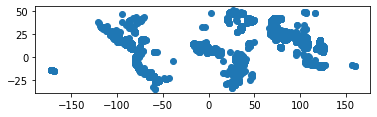

In [7]:
world_loans.plot()

<AxesSubplot:>

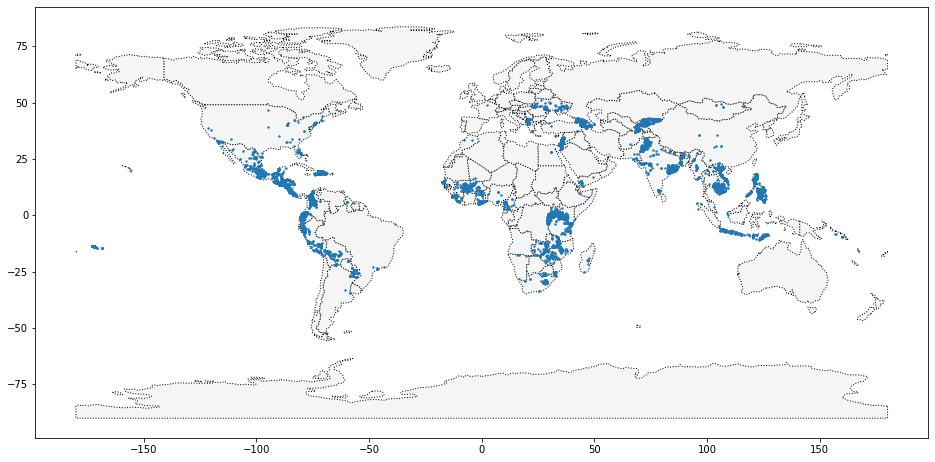

In [25]:
import matplotlib.pyplot as plt
ax = world.plot(figsize=(16, 8), color = 'whitesmoke', linestyle = ':', edgecolor = 'black')
world_loans.plot(ax=ax, markersize=2)

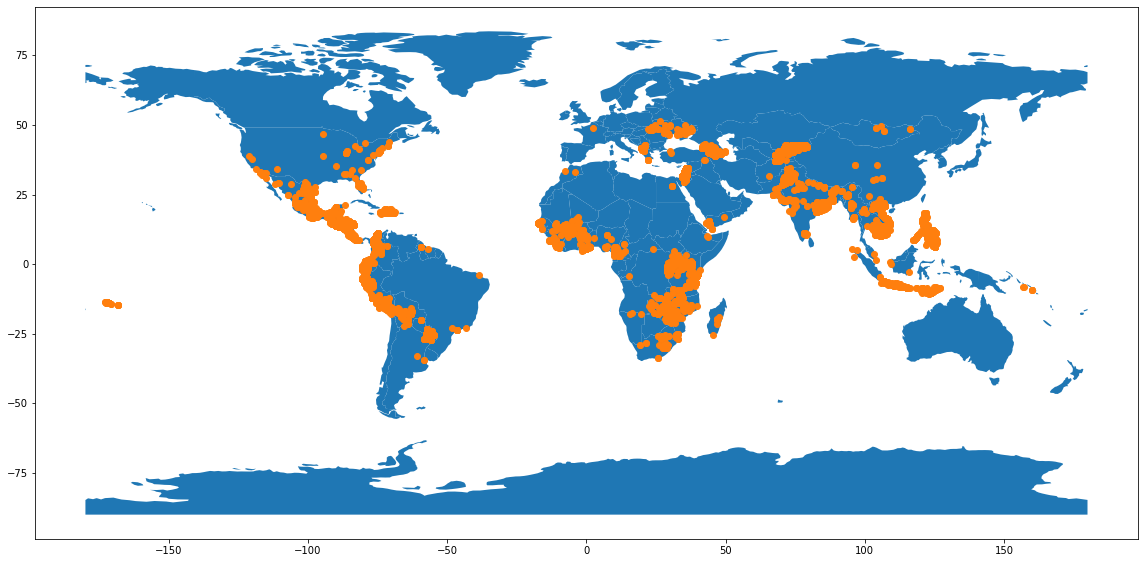

In [28]:
# 다른 방법
fig, ax = plt.subplots(figsize = (16, 8))
world.plot(ax = ax)
world_loans.plot(ax = ax, color = "C1")
fig.tight_layout()

### 3) Select loans based in the Philippines.

다음으로 필리핀에 기반을 둔 대출에 중점을 둘 것입니다. 다음 코드 셀을 사용하여 필리핀에 기반을 둔 대출이 있는 `world_loans`의 모든 행을 포함하는 GeoDataFrame `PHL_loans`를 생성합니다.

In [18]:
PHL_loans = world_loans.loc[world_loans["country"] == "Philippines"]
PHL_loans.head()

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
2859,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.73961 17.64228)
2860,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.74169 17.63235)
2861,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.46667 16.60000)
2862,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,6050,POINT (121.73333 17.83333)
2863,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,625,POINT (121.51800 16.72368)


### 4) Understand loans in the Philippines.

변경 없이 다음 코드 셀을 실행하여 필리핀의 모든 섬에 대한 경계가 포함된 GeoDataFrame `PHL`을 로드합니다.

In [19]:
# Load a KML file containing island boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("/Users/jungwoolee/Desktop/college/data mining/geo_data/Philippines_AL258.kml", driver='KML')
PHL.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."


`PHL` 및 `PHL_loans` GeoDataFrames를 사용하여 필리핀의 대출을 시각화합니다.

<AxesSubplot:>

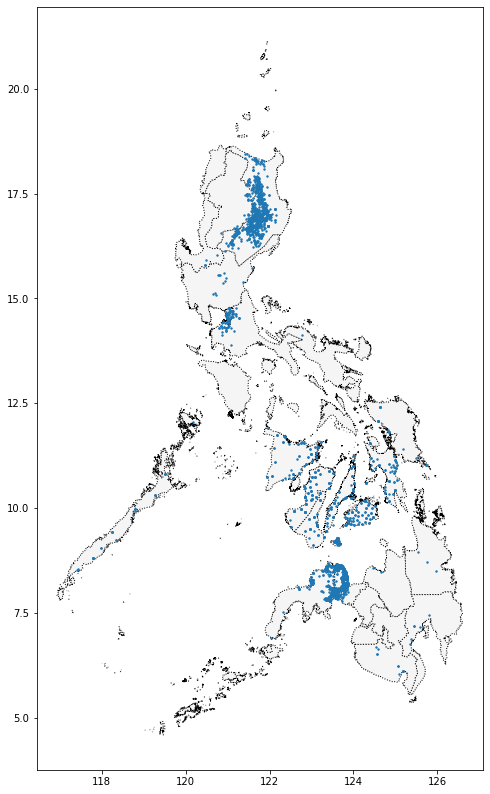

In [26]:
ax = PHL.plot(figsize =(8, 16), color = 'whitesmoke', linestyle = ':', edgecolor = 'black')
PHL_loans.plot(ax = ax, markersize = 2)

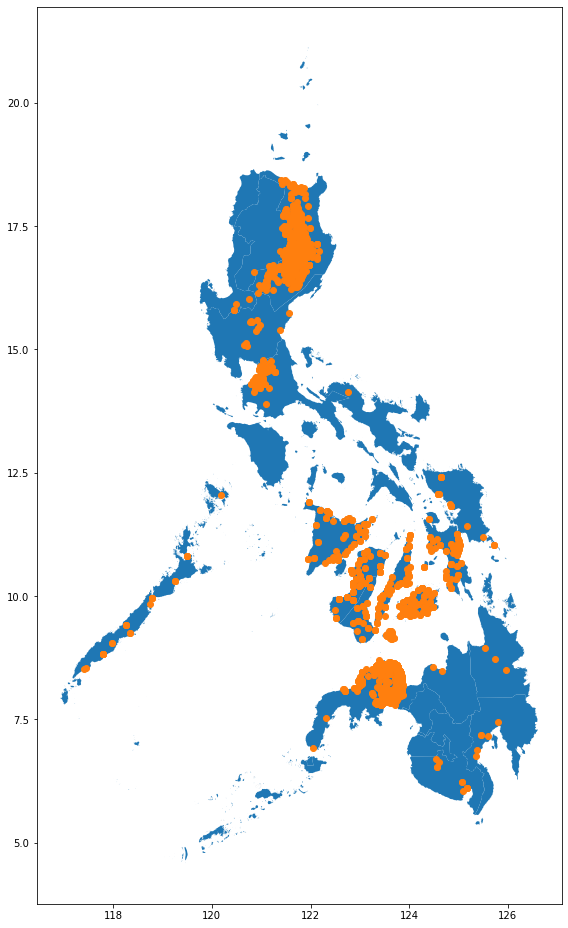

In [27]:
fig, ax = plt.subplots(figsize = (8, 16))
PHL.plot(ax = ax)
PHL_loans.plot(ax = ax, color = "C1")
fig.tight_layout()

새로운 현장 파트너를 모집하는 데 유용할 수 있는 섬을 식별할 수 있습니까? 현재 Kiva의 손이 닿지 않는 섬이 있습니까?

질문에 답하는 데 [이 지도](https://upload.wikimedia.org/wikipedia/commons/f/f6/Labelled_map_of_the_Philippines_-_Provinces_and_Regions.png)가 유용할 수 있습니다.